In [1]:
import pandas as pd
import codecs
import csv
import re

In [2]:
#with open("Final_comments.csv", "r", encoding='utf-8') as csvfile:
   # for row in reader:
      #  print(row)

In [2]:
!pip install contractions
import contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 11.1 MB/s eta 0:00:00


In [3]:
#Stage 1 Expansion of contracted words
def expand_contractions(text):
    words = []
    for word in text.split():
      words.append(contractions.fix(word))
    return ' '.join(words)

In [4]:
#Stage 2 set all comments to lowercase
def common_case(text):
      return text.lower()

In [5]:
#Stage 3 Perform text substitution for comments refering to pricing etc replacing markers
def replace_markers(text):
    pattern = r"[\$\£\d]+"
    text = re.sub(pattern, "${price}",text)
    return text

In [6]:
#Stage 4 Remove hyperlinks in the comments
def replace_http_links(text):
    pattern = r"(https://|http://)[A-Za-z0-9\/.]+"
    text = re.sub(pattern, "${link}}",text)
    return text

In [7]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [8]:
#Remove white spaces
def without_leading_trailing_whitespace(text):
  return text.strip()

In [9]:
#punctuation
def no_multi_punctuation(text):
      text = re.sub(r'[^\w\s]', '', text)
      return text

In [10]:
#Stage 5 tokenization

def text_to_tokens(text):
  tokens = []
  for sentance in sent_tokenize(text):
    for word in word_tokenize(sentance):
      tokens.append(word)
  return tokens


In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
#Stage 6 Removing stop words
def tokens_without_stopwords(tokens):
  stopwords = nltk.corpus.stopwords.words("english")
  keep = []
  for token in tokens:
    if not token in stopwords:
      keep.append(token)
  return keep

In [13]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [14]:
#Stage 7 Lemmatisation
def apply_lemmatisation(tokens):
  keep = []
  lemmatizer = WordNetLemmatizer()
  for token in tokens:
      keep.append(lemmatizer.lemmatize(token))
  return keep

In [15]:

#Defining the pre-processing pipeline
Final_comments = pd.read_csv('Final_comments.csv')
def preprocessing_pipeline(row):
    text = row["Comment"]
    text = expand_contractions(text)
    text = common_case(text)
    text = replace_markers(text)
    text = replace_http_links(text)
    text = without_leading_trailing_whitespace(text)
    text = no_multi_punctuation(text)
    tokens = text_to_tokens(text)
    tokens = tokens_without_stopwords(tokens)
    tokens = apply_lemmatisation(tokens)
    cleaned_comments = ' '.join(tokens)
    return cleaned_comments

Final_comments["cleaned_comments"] = Final_comments.apply(preprocessing_pipeline, axis=1)
Final_comments


,Author,Time,Comment,cleaned_comments
0,@banksarenotyourfriends,2024-05-06 14:41:02,"I've had one of these bikes for 5 years now, a...",one bike price year disagree anything said alt...
1,@peterwillson1355,2024-05-06 04:45:58,Fat bikes for fat people,fat bike fat people
2,@TheDZHEX,2024-05-05 21:26:35,The only actual benefit of the actual fat tire...,actual benefit actual fat tire seems sand grip...
3,@ceet3015,2024-05-05 09:18:14,About the battery: Typical misinformation. It'...,battery typical misinformation ah wh matter pr...
4,@Pyrolonn,2024-05-04 23:17:51,One downside...FOR THE REST OF US. That's not...,one downsidefor rest u ebike moped please keep...
...,...,...,...,...
1923,MantraProAttitude,2023-05-30 17:17:10,Imagine if everyone only used battery supporte...,imagine everyone used battery supported travel...
1924,SEND_ME_UR_CARS,2023-05-31 02:27:35,yeah a skateboard. exhilarating but terrifying...,yeah skateboard exhilarating terrifying especi...
1925,Big_Increase3289,2023-05-30 19:40:06,First of all if someone gained weight it’s not...,first someone gained weight stop riding bicycl...
1926,henderthing,2023-05-31 04:15:24,as someone who played around with a convention...,someone played around conventional longboard s...


In [16]:
Final_comments

,Author,Time,Comment,cleaned_comments
0,@banksarenotyourfriends,2024-05-06 14:41:02,"I've had one of these bikes for 5 years now, a...",one bike price year disagree anything said alt...
1,@peterwillson1355,2024-05-06 04:45:58,Fat bikes for fat people,fat bike fat people
2,@TheDZHEX,2024-05-05 21:26:35,The only actual benefit of the actual fat tire...,actual benefit actual fat tire seems sand grip...
3,@ceet3015,2024-05-05 09:18:14,About the battery: Typical misinformation. It'...,battery typical misinformation ah wh matter pr...
4,@Pyrolonn,2024-05-04 23:17:51,One downside...FOR THE REST OF US. That's not...,one downsidefor rest u ebike moped please keep...
...,...,...,...,...
1923,MantraProAttitude,2023-05-30 17:17:10,Imagine if everyone only used battery supporte...,imagine everyone used battery supported travel...
1924,SEND_ME_UR_CARS,2023-05-31 02:27:35,yeah a skateboard. exhilarating but terrifying...,yeah skateboard exhilarating terrifying especi...
1925,Big_Increase3289,2023-05-30 19:40:06,First of all if someone gained weight it’s not...,first someone gained weight stop riding bicycl...
1926,henderthing,2023-05-31 04:15:24,as someone who played around with a convention...,someone played around conventional longboard s...


In [17]:
Final_comments['comment_count'] = Final_comments['cleaned_comments'].apply(lambda x: len(x))
Final_comments

,Author,Time,Comment,cleaned_comments,comment_count
0,@banksarenotyourfriends,2024-05-06 14:41:02,"I've had one of these bikes for 5 years now, a...",one bike price year disagree anything said alt...,288
1,@peterwillson1355,2024-05-06 04:45:58,Fat bikes for fat people,fat bike fat people,19
2,@TheDZHEX,2024-05-05 21:26:35,The only actual benefit of the actual fat tire...,actual benefit actual fat tire seems sand grip...,243
3,@ceet3015,2024-05-05 09:18:14,About the battery: Typical misinformation. It'...,battery typical misinformation ah wh matter pr...,208
4,@Pyrolonn,2024-05-04 23:17:51,One downside...FOR THE REST OF US. That's not...,one downsidefor rest u ebike moped please keep...,112
...,...,...,...,...,...
1923,MantraProAttitude,2023-05-30 17:17:10,Imagine if everyone only used battery supporte...,imagine everyone used battery supported travel...,155
1924,SEND_ME_UR_CARS,2023-05-31 02:27:35,yeah a skateboard. exhilarating but terrifying...,yeah skateboard exhilarating terrifying especi...,107
1925,Big_Increase3289,2023-05-30 19:40:06,First of all if someone gained weight it’s not...,first someone gained weight stop riding bicycl...,217
1926,henderthing,2023-05-31 04:15:24,as someone who played around with a convention...,someone played around conventional longboard s...,108


In [18]:
Final_comments = Final_comments[Final_comments["comment_count"] >= 10]

Final_comments

,Author,Time,Comment,cleaned_comments,comment_count
0,@banksarenotyourfriends,2024-05-06 14:41:02,"I've had one of these bikes for 5 years now, a...",one bike price year disagree anything said alt...,288
1,@peterwillson1355,2024-05-06 04:45:58,Fat bikes for fat people,fat bike fat people,19
2,@TheDZHEX,2024-05-05 21:26:35,The only actual benefit of the actual fat tire...,actual benefit actual fat tire seems sand grip...,243
3,@ceet3015,2024-05-05 09:18:14,About the battery: Typical misinformation. It'...,battery typical misinformation ah wh matter pr...,208
4,@Pyrolonn,2024-05-04 23:17:51,One downside...FOR THE REST OF US. That's not...,one downsidefor rest u ebike moped please keep...,112
...,...,...,...,...,...
1923,MantraProAttitude,2023-05-30 17:17:10,Imagine if everyone only used battery supporte...,imagine everyone used battery supported travel...,155
1924,SEND_ME_UR_CARS,2023-05-31 02:27:35,yeah a skateboard. exhilarating but terrifying...,yeah skateboard exhilarating terrifying especi...,107
1925,Big_Increase3289,2023-05-30 19:40:06,First of all if someone gained weight it’s not...,first someone gained weight stop riding bicycl...,217
1926,henderthing,2023-05-31 04:15:24,as someone who played around with a convention...,someone played around conventional longboard s...,108


In [19]:
!pip install langdetect
from langdetect import detect

def language_code(row):
  try:
    return detect(row["Comment"])
  except:
    return "Unknown"

Final_comments["lang"] = Final_comments.apply(language_code, axis=1)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=cc80a477e065f1f27f478e5898f780636e2da413d9126b847cfcf8c5b8a45980
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


<ipython-input-19-b175d6b080c2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final_comments["lang"] = Final_comments.apply(language_code, axis=1)


In [20]:
Final_comments

,Author,Time,Comment,cleaned_comments,comment_count,lang
0,@banksarenotyourfriends,2024-05-06 14:41:02,"I've had one of these bikes for 5 years now, a...",one bike price year disagree anything said alt...,288,en
1,@peterwillson1355,2024-05-06 04:45:58,Fat bikes for fat people,fat bike fat people,19,da
2,@TheDZHEX,2024-05-05 21:26:35,The only actual benefit of the actual fat tire...,actual benefit actual fat tire seems sand grip...,243,en
3,@ceet3015,2024-05-05 09:18:14,About the battery: Typical misinformation. It'...,battery typical misinformation ah wh matter pr...,208,en
4,@Pyrolonn,2024-05-04 23:17:51,One downside...FOR THE REST OF US. That's not...,one downsidefor rest u ebike moped please keep...,112,en
...,...,...,...,...,...,...
1923,MantraProAttitude,2023-05-30 17:17:10,Imagine if everyone only used battery supporte...,imagine everyone used battery supported travel...,155,en
1924,SEND_ME_UR_CARS,2023-05-31 02:27:35,yeah a skateboard. exhilarating but terrifying...,yeah skateboard exhilarating terrifying especi...,107,en
1925,Big_Increase3289,2023-05-30 19:40:06,First of all if someone gained weight it’s not...,first someone gained weight stop riding bicycl...,217,en
1926,henderthing,2023-05-31 04:15:24,as someone who played around with a convention...,someone played around conventional longboard s...,108,en


In [21]:
Final_comments['lang'].value_counts()

lang
en         1750
af            7
no            6
Unknown       6
fr            5
so            4
et            4
nl            4
ca            3
tl            3
ro            2
de            2
cy            2
da            2
it            1
vi            1
fi            1
id            1
pl            1
sk            1
Name: count, dtype: int64

In [22]:
Final_comments = Final_comments[Final_comments["lang"]=="en"].copy()
Final_comments

,Author,Time,Comment,cleaned_comments,comment_count,lang
0,@banksarenotyourfriends,2024-05-06 14:41:02,"I've had one of these bikes for 5 years now, a...",one bike price year disagree anything said alt...,288,en
2,@TheDZHEX,2024-05-05 21:26:35,The only actual benefit of the actual fat tire...,actual benefit actual fat tire seems sand grip...,243,en
3,@ceet3015,2024-05-05 09:18:14,About the battery: Typical misinformation. It'...,battery typical misinformation ah wh matter pr...,208,en
4,@Pyrolonn,2024-05-04 23:17:51,One downside...FOR THE REST OF US. That's not...,one downsidefor rest u ebike moped please keep...,112,en
5,@kupikichuvava1661,2024-05-04 20:49:03,Buy fat tire bike and replace fat tires with M...,buy fat tire bike replace fat tire mtb tire,43,en
...,...,...,...,...,...,...
1923,MantraProAttitude,2023-05-30 17:17:10,Imagine if everyone only used battery supporte...,imagine everyone used battery supported travel...,155,en
1924,SEND_ME_UR_CARS,2023-05-31 02:27:35,yeah a skateboard. exhilarating but terrifying...,yeah skateboard exhilarating terrifying especi...,107,en
1925,Big_Increase3289,2023-05-30 19:40:06,First of all if someone gained weight it’s not...,first someone gained weight stop riding bicycl...,217,en
1926,henderthing,2023-05-31 04:15:24,as someone who played around with a convention...,someone played around conventional longboard s...,108,en


In [23]:
Final_comments

,Author,Time,Comment,cleaned_comments,comment_count,lang
0,@banksarenotyourfriends,2024-05-06 14:41:02,"I've had one of these bikes for 5 years now, a...",one bike price year disagree anything said alt...,288,en
2,@TheDZHEX,2024-05-05 21:26:35,The only actual benefit of the actual fat tire...,actual benefit actual fat tire seems sand grip...,243,en
3,@ceet3015,2024-05-05 09:18:14,About the battery: Typical misinformation. It'...,battery typical misinformation ah wh matter pr...,208,en
4,@Pyrolonn,2024-05-04 23:17:51,One downside...FOR THE REST OF US. That's not...,one downsidefor rest u ebike moped please keep...,112,en
5,@kupikichuvava1661,2024-05-04 20:49:03,Buy fat tire bike and replace fat tires with M...,buy fat tire bike replace fat tire mtb tire,43,en
...,...,...,...,...,...,...
1923,MantraProAttitude,2023-05-30 17:17:10,Imagine if everyone only used battery supporte...,imagine everyone used battery supported travel...,155,en
1924,SEND_ME_UR_CARS,2023-05-31 02:27:35,yeah a skateboard. exhilarating but terrifying...,yeah skateboard exhilarating terrifying especi...,107,en
1925,Big_Increase3289,2023-05-30 19:40:06,First of all if someone gained weight it’s not...,first someone gained weight stop riding bicycl...,217,en
1926,henderthing,2023-05-31 04:15:24,as someone who played around with a convention...,someone played around conventional longboard s...,108,en


In [25]:

#Final_comments.to_csv("Final_last_comments.csv", index=False)

In [24]:
from collections import Counter

word_counter = Counter()
for row in Final_comments.to_dict("records"): #converts_to_dictionary
  word_counter.update(row["cleaned_comments"].split()) #tokenization
Final_comments_tf = pd.DataFrame(word_counter.most_common(60))
Final_comments_tf.columns = ["term", "frequency"]
Final_comments_tf

,term,frequency
0,bike,1135
1,price,1013
2,ebike,465
3,get,433
4,ride,373
5,one,356
6,would,318
7,like,310
8,people,309
9,ebikes,247


In [26]:
!pip install wordcloud
from wordcloud import WordCloud
cloud = WordCloud(width=800, height=400, colormap='Blues')
cloud.generate_from_frequencies(dict(word_counter.most_common(150)))
image = cloud.to_image()
image.save("wordcloud.png")

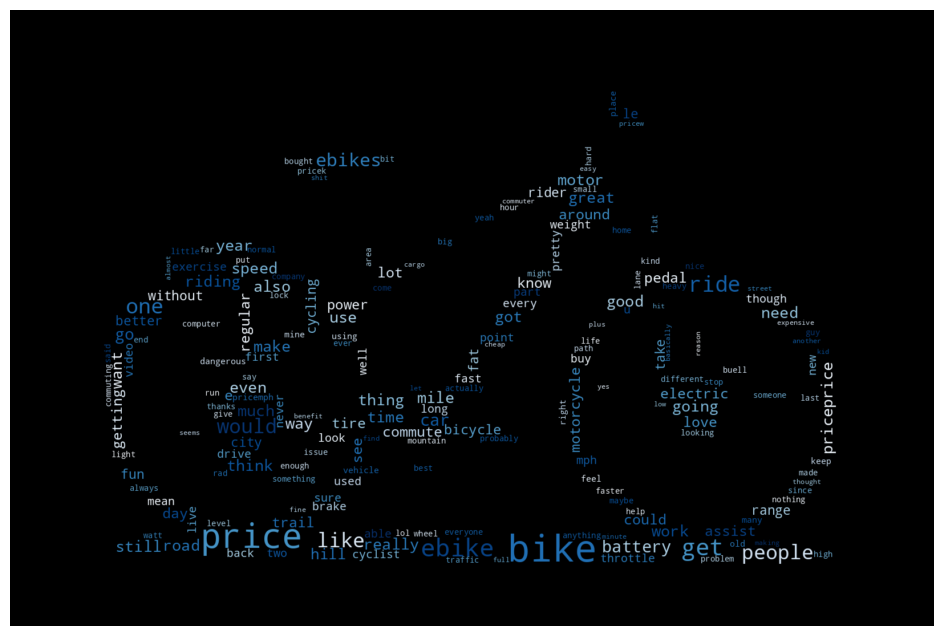

In [27]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Read the bicycle image
bicycle_mask = np.array(Image.open("/content/pulse-xt-electric-bike.jpg"))

#Generate the word cloud using the bicycle mask
cloud = WordCloud(width=800, height=400, colormap='Blues', mask=bicycle_mask)
cloud.generate_from_frequencies(dict(word_counter.most_common(200)))

cloud.to_file("wordcloud1.png")
plt.figure(figsize=(15, 8))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [25]:
#Topic selctions using LDA with Gensim
!pip install gensim
import gensim
import gensim.corpora as corpora
from pprint import pprint

 #tokenizing_the_words
documents = [comment.split() for comment in Final_comments["cleaned_comments"]]
#creating_dictionaries
vocab = corpora.Dictionary(documents)
#converts_to_bag-of-words_format(IDandFrequency)
corpus = [vocab.doc2bow(text) for text in documents]

num_topics = 10
lda = gensim.models.LdaMulticore(corpus=corpus, id2word=vocab, num_topics=num_topics)
pprint(lda.print_topics())

[(0,
  '0.021*"bike" + 0.019*"price" + 0.012*"ebike" + 0.012*"people" + 0.011*"one" '
  '+ 0.008*"get" + 0.007*"would" + 0.006*"year" + 0.006*"think" + '
  '0.005*"electric"'),
 (1,
  '0.031*"price" + 0.018*"bike" + 0.016*"get" + 0.014*"ride" + 0.009*"people" '
  '+ 0.009*"ebikes" + 0.008*"ebike" + 0.008*"one" + 0.006*"road" + '
  '0.006*"use"'),
 (2,
  '0.041*"bike" + 0.027*"price" + 0.014*"one" + 0.013*"ebike" + 0.011*"get" + '
  '0.008*"like" + 0.007*"would" + 0.007*"thing" + 0.006*"people" + '
  '0.005*"ride"'),
 (3,
  '0.026*"bike" + 0.025*"price" + 0.009*"ebike" + 0.008*"like" + 0.008*"would" '
  '+ 0.007*"also" + 0.007*"battery" + 0.006*"go" + 0.006*"ride" + '
  '0.005*"ebikes"'),
 (4,
  '0.024*"bike" + 0.012*"price" + 0.011*"get" + 0.011*"would" + 0.010*"ride" + '
  '0.009*"battery" + 0.007*"people" + 0.006*"one" + 0.006*"also" + '
  '0.006*"great"'),
 (5,
  '0.030*"bike" + 0.020*"ebike" + 0.011*"get" + 0.009*"price" + 0.009*"one" + '
  '0.009*"people" + 0.008*"go" + 0.008*"lik

In [26]:
#Assign topics to the individual comments
pd.DataFrame(lda.get_document_topics(corpus))

,0,1,2,3,4,5,6,7,8,9
0,"(1, 0.9804242)",None,None,None,None,None,None,None,None,None
1,"(9, 0.97630334)",None,None,None,None,None,None,None,None,None
2,"(1, 0.97271556)",None,None,None,None,None,None,None,None,None
3,"(2, 0.95260346)",None,None,None,None,None,None,None,None,None
4,"(0, 0.010002185)","(1, 0.010002211)","(2, 0.010003121)","(3, 0.010003416)","(4, 0.010003564)","(5, 0.90997237)","(6, 0.010002235)","(7, 0.010004104)","(8, 0.010004011)","(9, 0.010002773)"
...,...,...,...,...,...,...,...,...,...,...
1745,"(0, 0.010007416)","(1, 0.9099396)","(2, 0.010006655)","(3, 0.010006425)","(4, 0.010006505)","(5, 0.010006201)","(6, 0.010006711)","(7, 0.010007672)","(8, 0.010007363)","(9, 0.010005501)"
1746,"(4, 0.9437205)",None,None,None,None,None,None,None,None,None
1747,"(0, 0.91303873)","(7, 0.06194057)",None,None,None,None,None,None,None,None
1748,"(2, 0.93996465)",None,None,None,None,None,None,None,None,None


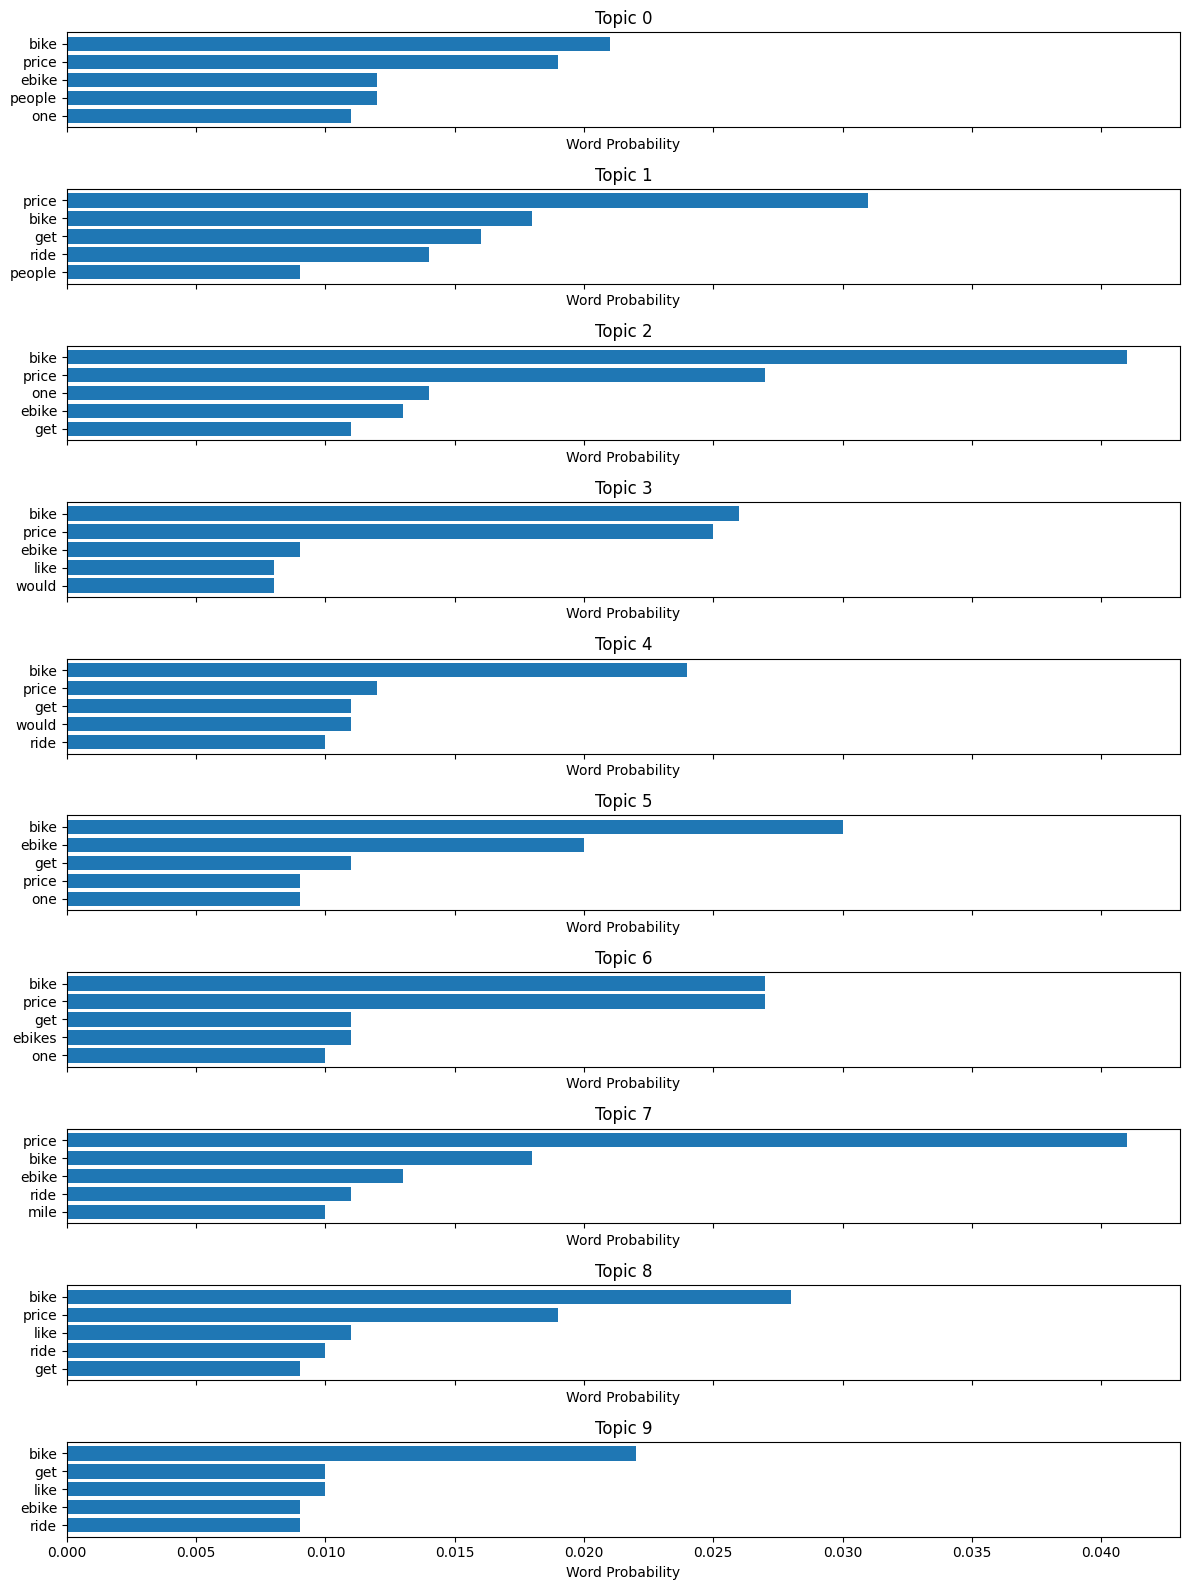

In [27]:
import matplotlib.pyplot as plt

def plot_top_words(lda_topics, num_words=10):
    fig, axes = plt.subplots(nrows=num_topics, ncols=1, figsize=(12, 16), sharex=True)

    for i, (topic, words) in enumerate(lda_topics):
        ax = axes[i]
        words_list = words.split('+')
        words = [word.split('*')[1].strip().strip('"') for word in words_list]
        probs = [float(word.split('*')[0]) for word in words_list]
        ax.barh(words[:num_words][::-1], probs[:num_words][::-1])
        ax.set_title(f'Topic {topic}')
        ax.set_xlabel('Word Probability')

    plt.tight_layout()
    plt.show()

# Example usage:
lda_topics = lda.print_topics()
num_topics = 10
plot_top_words(lda_topics, num_words=5)


In [28]:
Final_comments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1750 entries, 0 to 1927
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Author            1750 non-null   object
 1   Time              1750 non-null   object
 2   Comment           1750 non-null   object
 3   cleaned_comments  1750 non-null   object
 4   comment_count     1750 non-null   int64 
 5   lang              1750 non-null   object
dtypes: int64(1), object(5)
memory usage: 160.2+ KB


In [29]:
# Convert 'Date' column to datetime dtype
Final_comments['Time'] = pd.to_datetime(Final_comments['Time'])

In [30]:
Final_comments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1750 entries, 0 to 1927
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Author            1750 non-null   object        
 1   Time              1750 non-null   datetime64[ns]
 2   Comment           1750 non-null   object        
 3   cleaned_comments  1750 non-null   object        
 4   comment_count     1750 non-null   int64         
 5   lang              1750 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 160.2+ KB


<Axes: title={'center': 'comments posted over time'}, xlabel='date', ylabel='comments'>

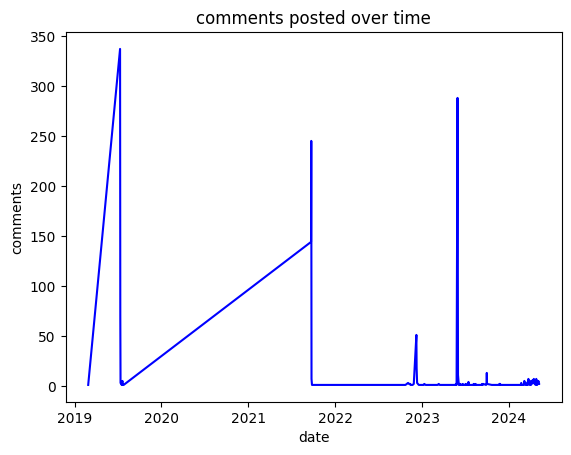

In [31]:
#Time series plot
Final_comments.groupby(Final_comments["Time"].dt.date).size().plot(
    title="comments posted over time",ylabel="comments", xlabel="date", color="b")

In [32]:
#Comon phrases used throughout the comment section
import nltk
nltk.download('brown')
nltk.download('punkt')

from collections import Counter
from textblob import TextBlob

noun_counter = Counter()
for comment in Final_comments["cleaned_comments"].to_list():
  blob = TextBlob(comment)
  noun_counter.update(blob.noun_phrases)

for np in noun_counter.most_common(20):
  print(np)

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


('regular bike', 38)
('price mile', 30)
('price year', 26)
('e bike', 23)
('electric bike', 19)
('fat tire', 13)
('price mph', 10)
('normal bike', 10)
('price minute', 9)
('bike lane', 8)
('motor vehicle', 7)
('people bike', 7)
('bike path', 7)
('road bike', 6)
('priceprice mile', 6)
('lot people', 5)
('new bike', 5)
('great video', 5)
('price lb', 5)
('price time', 5)


<Axes: title={'center': 'no. comments posted by the top 15 authors'}, xlabel='Author', ylabel='comments'>

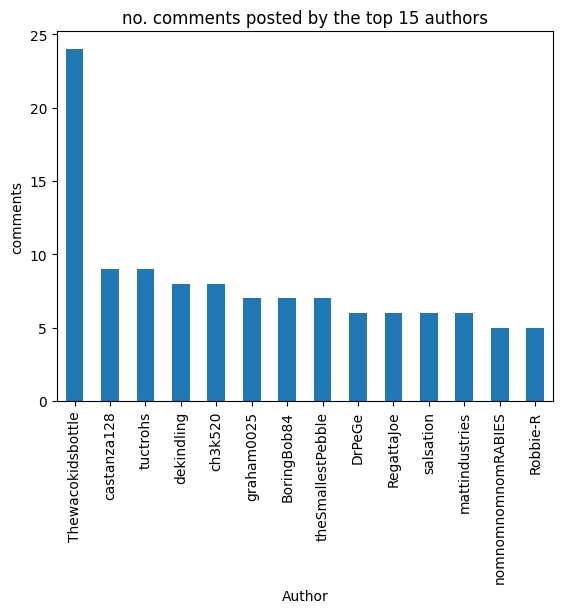

In [33]:
#Plot the authors that had the most comments
Final_comments.groupby(Final_comments["Author"]).size().sort_values(ascending=False).iloc[1:15].plot(kind="bar", ylabel="comments",
      title="no. comments posted by the top 15 authors")

In [34]:
from gensim.models.coherencemodel import CoherenceModel

# Compute coherence score
coherence_model_lda = CoherenceModel(model=lda, texts=documents, dictionary=vocab, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.586165401672188


In [35]:
print(Final_comments.columns)

Index(['Author', 'Time', 'Comment', 'cleaned_comments', 'comment_count',
       'lang'],
      dtype='object')


In [ ]:
#import nltk
#nltk.download('vader_lexicon')

In [36]:
#Calculate owner sentiments for each comment
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to apply VADER sentiment analysis to each text entry
def get_sentiment_score(text):
    scores = sid.polarity_scores(text)
    return scores['compound']

# Apply VADER sentiment analysis to each text entry in the DataFrame
Final_comments['sentiment_score'] = Final_comments["cleaned_comments"].apply(get_sentiment_score)

# Analyze the sentiment scores
# For example, you can calculate the average sentiment score or classify sentiments based on threshold values
average_score = Final_comments['sentiment_score'].mean()
print("Average Sentiment Score:", average_score)

# Classify sentiments based on threshold values
Final_comments['sentiment_label'] = Final_comments['sentiment_score'].apply(lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral'))
Final_comments


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Average Sentiment Score: 0.2510929142857143


,Author,Time,Comment,cleaned_comments,comment_count,lang,sentiment_score,sentiment_label
0,@banksarenotyourfriends,2024-05-06 14:41:02,"I've had one of these bikes for 5 years now, a...",one bike price year disagree anything said alt...,288,en,0.7574,positive
2,@TheDZHEX,2024-05-05 21:26:35,The only actual benefit of the actual fat tire...,actual benefit actual fat tire seems sand grip...,243,en,0.8316,positive
3,@ceet3015,2024-05-05 09:18:14,About the battery: Typical misinformation. It'...,battery typical misinformation ah wh matter pr...,208,en,-0.2960,negative
4,@Pyrolonn,2024-05-04 23:17:51,One downside...FOR THE REST OF US. That's not...,one downsidefor rest u ebike moped please keep...,112,en,0.3182,positive
5,@kupikichuvava1661,2024-05-04 20:49:03,Buy fat tire bike and replace fat tires with M...,buy fat tire bike replace fat tire mtb tire,43,en,0.0000,neutral
...,...,...,...,...,...,...,...,...
1923,MantraProAttitude,2023-05-30 17:17:10,Imagine if everyone only used battery supporte...,imagine everyone used battery supported travel...,155,en,0.3182,positive
1924,SEND_ME_UR_CARS,2023-05-31 02:27:35,yeah a skateboard. exhilarating but terrifying...,yeah skateboard exhilarating terrifying especi...,107,en,0.4215,positive
1925,Big_Increase3289,2023-05-30 19:40:06,First of all if someone gained weight it’s not...,first someone gained weight stop riding bicycl...,217,en,-0.4939,negative
1926,henderthing,2023-05-31 04:15:24,as someone who played around with a convention...,someone played around conventional longboard s...,108,en,0.8442,positive


In [58]:
#Polarity
#from nltk.sentiment.vader import SentimentIntensityAnalyzer
#sia = SentimentIntensityAnalyzer()
#sia.polarity_scores("cleaned_comments")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [37]:
Final_comments['sentiment_score'].describe()

count    1750.000000
mean        0.251093
std         0.489394
min        -0.984000
25%         0.000000
50%         0.318200
75%         0.680800
max         0.991300
Name: sentiment_score, dtype: float64

<Axes: title={'center': 'Frequency distribution of normalised sentiment score'}, ylabel='Frequency'>

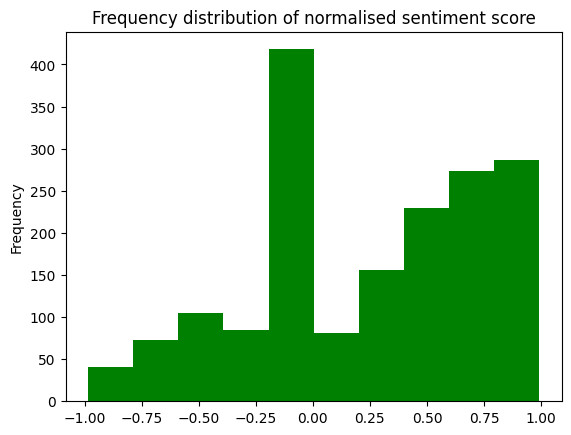

In [38]:
Final_comments['sentiment_score'].plot(kind="hist",color="g", title="Frequency distribution of normalised sentiment score")

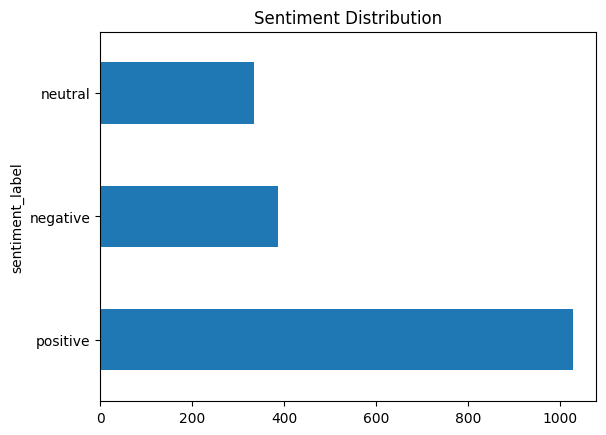

In [39]:
#Final_comments['sentiment_label'].value_counts().plot(kind="barh")
Final_comments['sentiment_label'].value_counts().plot(kind="barh")
plt.title("Sentiment Distribution")
plt.show()

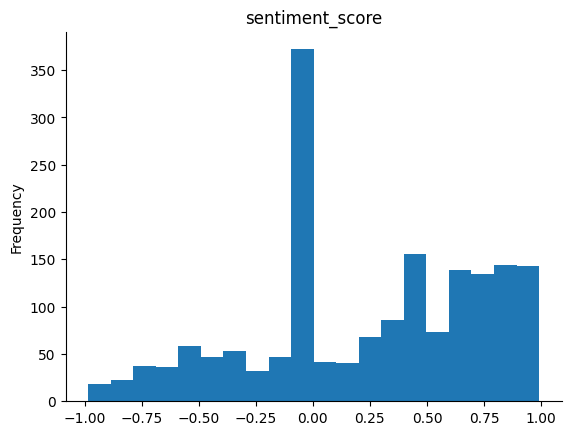

In [65]:
#Plot sentiment graph

from matplotlib import pyplot as plt
Final_comments['sentiment_score'].plot(kind='hist', bins=20, title='sentiment_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [40]:
#mean of all sentiments
Final_comments['sentiment_score'].mean()

0.2510929142857143

In [41]:
#Top 5 positive sentiments
Final_comments.sort_values(by="sentiment_score",
                   ascending=False).head(5)["sentiment_score"].mean().round(2)

0.99

In [42]:
print(Final_comments.columns)

Index(['Author', 'Time', 'Comment', 'cleaned_comments', 'comment_count',
       'lang', 'sentiment_score', 'sentiment_label'],
      dtype='object')


In [43]:
#Common words
from collections import Counter
word_counter = Counter()

for row in Final_comments.to_dict("records"):
    word_counter.update(row["cleaned_comments"].split())
    word_counter.most_common(10)


In [44]:
print(word_counter)

Counter({'bike': 1135, 'price': 1013, 'ebike': 465, 'get': 433, 'ride': 373, 'one': 356, 'would': 318, 'like': 310, 'people': 309, 'ebikes': 247, 'car': 207, 'battery': 205, 'go': 189, 'want': 176, 'use': 171, 'motor': 169, 'also': 167, 'mile': 165, 'year': 164, 'road': 164, 'work': 160, 'going': 156, 'way': 155, 'time': 154, 'much': 149, 'make': 148, 'riding': 148, 'great': 143, 'good': 142, 'really': 139, 'need': 138, 'got': 136, 'still': 132, 'even': 131, 'priceprice': 130, 'speed': 129, 'thing': 128, 'think': 127, 'hill': 116, 'commute': 111, 'lot': 109, 'tire': 106, 'could': 106, 'assist': 106, 'around': 105, 'electric': 105, 'pedal': 105, 'see': 102, 'love': 102, 'know': 100, 'day': 99, 'motorcycle': 99, 'trail': 97, 'e': 95, 'getting': 92, 'regular': 88, 'bicycle': 86, 'power': 85, 'take': 80, 'range': 80, 'without': 80, 'cycling': 80, 'fun': 80, 'city': 79, 'better': 78, 'fat': 77, 'le': 75, 'rider': 75, 'cyclist': 75, 'video': 74, 'new': 73, 'long': 72, 'though': 72, 'u': 71, 

In [46]:
#features
features = [word for word, freq in noun_counter.most_common(10)]
features

['regular bike',
 'price mile',
 'price year',
 'e bike',
 'electric bike',
 'fat tire',
 'price mph',
 'normal bike',
 'price minute',
 'bike lane']

In [47]:
#try, dont run
def to_features(row):
  keep = []
  text1 = row["cleaned_comments"]
  for word in text1.split():
      if word in features:
        keep.append(word)
  return ' '.join(keep)

Final_comments['features'] = Final_comments.apply(to_features,axis=1)

In [48]:
#Evaluate goodness of fit
from textblob import TextBlob
from textblob.classifiers import NaiveBayesClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(Final_comments['cleaned_comments'], Final_comments['sentiment_label'], test_size=0.2, random_state=42, shuffle=True)
train_data = list(zip(X_train, y_train))
test_data = list(zip(X_test, y_test))
# Train the Naive Bayes classifier
nb_classifier = NaiveBayesClassifier(train_data)

# Evaluate the model
accuracy = nb_classifier.accuracy(test_data)
print("NaiveBayes Accuracy:", accuracy)

NaiveBayes Accuracy: 0.6228571428571429


In [52]:
!pip install pyLDAvis
import pyLDAvis.gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 9.8 MB/s eta 0:00:00


In [53]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, vocab)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.018959 -0.011412       1        1  16.882347
2      0.011978 -0.004616       2        1  14.837436
5      0.000133 -0.010938       3        1  10.812972
6      0.024110 -0.002644       4        1  10.763870
7      0.037265  0.023139       5        1  10.705626
4     -0.013229 -0.058472       6        1   8.443917
3      0.011157 -0.025407       7        1   8.170141
8      0.007911  0.063324       8        1   7.766515
0     -0.003064  0.011470       9        1   7.369258
9     -0.095221  0.015556      10        1   4.247918, topic_info=           Term        Freq       Total Category  logprob  loglift
4          bike  983.000000  983.000000  Default  30.0000  30.0000
26        price  897.000000  897.000000  Default  29.0000  29.0000
199        like  263.000000  263.000000  Default  28.0000  28.0000
91        ebike  406.000000  406.000000  Default  27.0000  27.0000
1501  dangerous   49.000000   49.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
14         good    5.591462  125.235017  Topic10  -5.6644   0.0498
41        would    6.737752  273.926111  Topic10  -5.4779  -0.5464
119        much    5.073244  130.062493  Topic10  -5.7616  -0.0853
814        want    4.924659  155.264573  Topic10  -5.7914  -0.2921
32         time    4.604079  136.771319  Topic10  -5.8587  -0.2326

[852 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
2142      3  0.575146  accidentally
247       5  0.568236       accused
5411      4  0.600806   acknowledge
4923      1  0.123301      acoustic
4923      2  0.493203      acoustic
...     ...       ...           ...
2366      5  0.568192     youtubers
4938      1  0.706531          zone
4938      5  0.117755          zone
4938      8  0.117755          zone
4325      2  0.734824       zooming

[2082 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 6, 7, 8, 5, 4, 9, 1, 10])